In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Udemy_Courses.csv")
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
data.dtypes #we csn chech that publish timestamp is of object type so to work on this we have to convert this in to date and time


course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [11]:
data=pd.read_csv("Udemy_Courses.csv",parse_dates=["published_timestamp"])
data.dtypes #now thi is converted into date time

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [15]:
#check for duplicate value and drop them
dup=data.duplicated().any()
print("Are their any duplicated value in the dataset?",dup)

Are their any duplicated value in the dataset? True


In [17]:
data=data.drop_duplicates()
dup=data.duplicated().any()
print("Are their any duplicated value in the dataset?",dup)

Are their any duplicated value in the dataset? False


In [21]:
#number of cources per subject
data["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

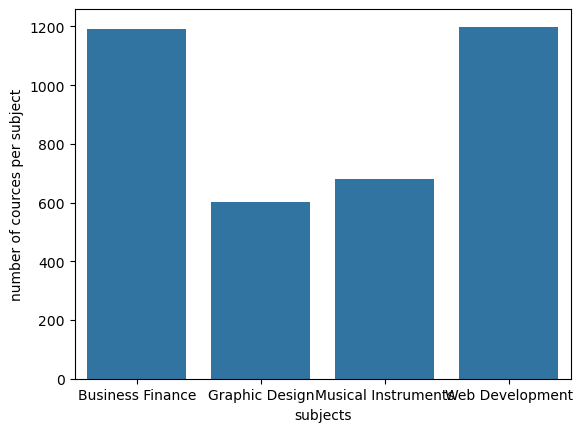

In [25]:
sns.countplot(x=data["subject"])
plt.xlabel("subjects")
plt.ylabel("number of cources per subject")
plt.show()

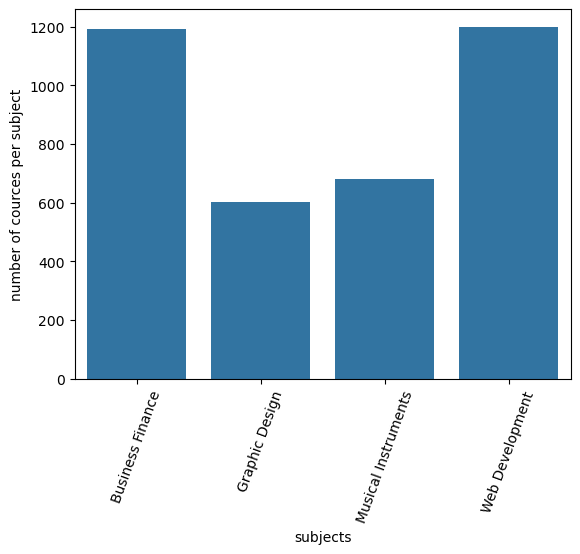

In [37]:
#to remove the overlabbing of x ticks
sns.countplot(x=data["subject"])
plt.xlabel("subjects")
plt.ylabel("number of cources per subject")
plt.xticks(rotation=70)
plt.show()

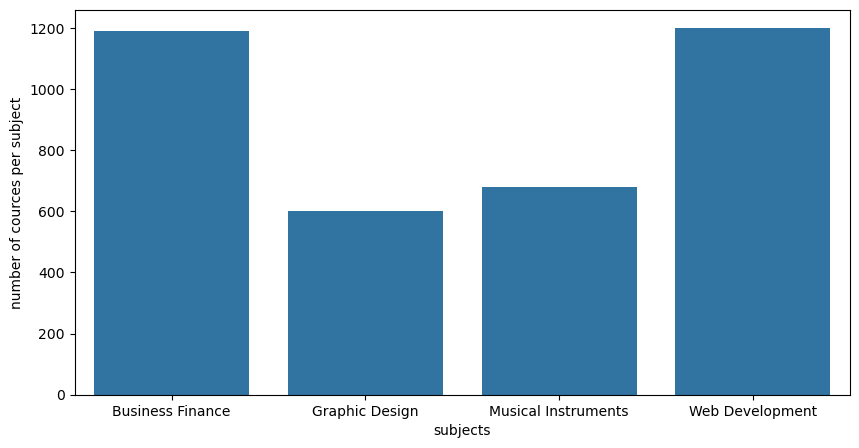

In [35]:
#we can increase the size of graph for reduxe the overlapping pf the graph
plt.figure(figsize=(10,5))
sns.countplot(x=data["subject"])
plt.xlabel("subjects")
plt.ylabel("number of cources per subject")
plt.show()

In [41]:
#which type(free or paid) has more number of lectures so
data.groupby("is_paid")["num_lectures"].sum()

is_paid
False      6639
True     140756
Name: num_lectures, dtype: int64

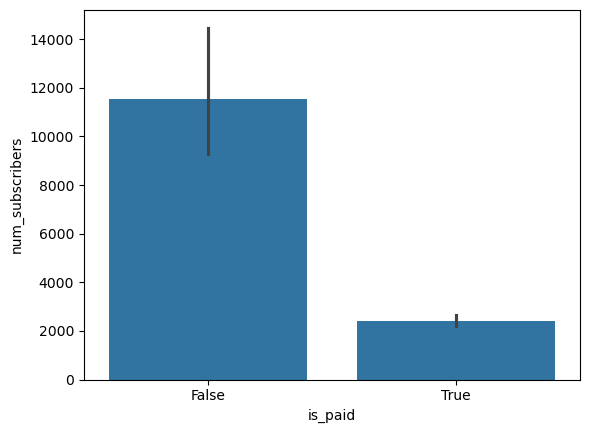

In [47]:
#which type(free or paid) has more number subscribers so

sns.barplot(data=data,x="is_paid",y="num_subscribers") #this will take mean
plt.show()

In [53]:
data.groupby("is_paid")["num_subscribers"].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

In [55]:
data.groupby("is_paid")["num_lectures"].mean()

is_paid
False    21.416129
True     41.866746
Name: num_lectures, dtype: float64

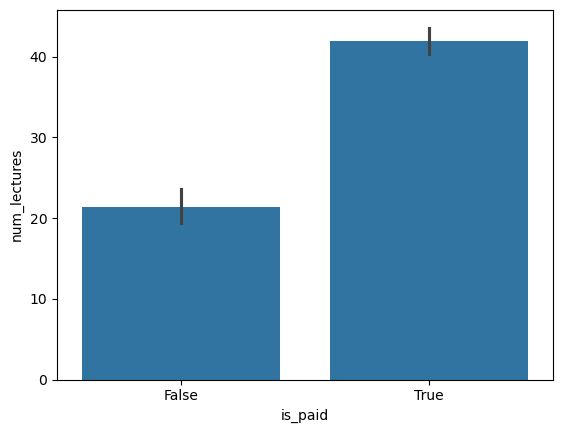

In [57]:

sns.barplot(data=data,x="is_paid",y="num_lectures") #this will take mean
plt.show()

In [61]:
#find the mpst popular cource title
data[data["num_subscribers"]==data["num_subscribers"].max()]["course_title"]

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [73]:
#display 10 most popular couses as per number of subscribers
top_10=data[["num_subscribers","course_title"]].sort_values(by="num_subscribers",ascending=False).head(10)
top_10

,num_subscribers,course_title
2827,268923,Learn HTML5 Programming From Scratch
3032,161029,Coding for Entrepreneurs Basic
3230,121584,The Web Developer Bootcamp
2783,120291,Build Your First Website in 1 Week with HTML5 ...
3232,114512,The Complete Web Developer Course 2.0
1896,101154,Free Beginner Electric Guitar Lessons
2589,98867,Web Design for Web Developers: Build Beautiful...
2619,84897,Learn Javascript & JQuery From Scratch
3289,83737,Practical PHP: Master the Basics and Code Dyna...
3247,79612,JavaScript: Understanding the Weird Parts


C:\Users\user\AppData\Local\Temp\ipykernel_28280\2255084697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10,x="num_subscribers",y="course_title",palette="viridis")


<Axes: xlabel='num_subscribers', ylabel='course_title'>

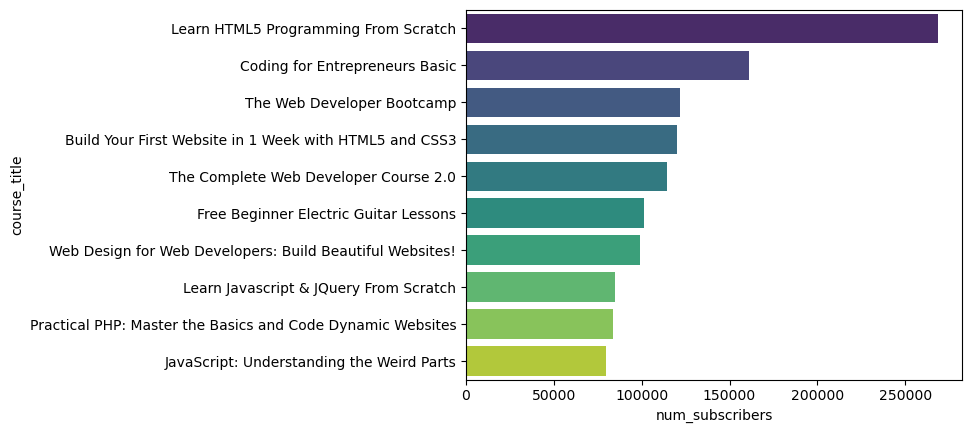

In [81]:
sns.barplot(data=top_10,x="num_subscribers",y="course_title",palette="viridis")

C:\Users\user\AppData\Local\Temp\ipykernel_28280\1458971309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="subject",y="num_reviews",palette="viridis") #it show mean


<Axes: xlabel='subject', ylabel='num_reviews'>

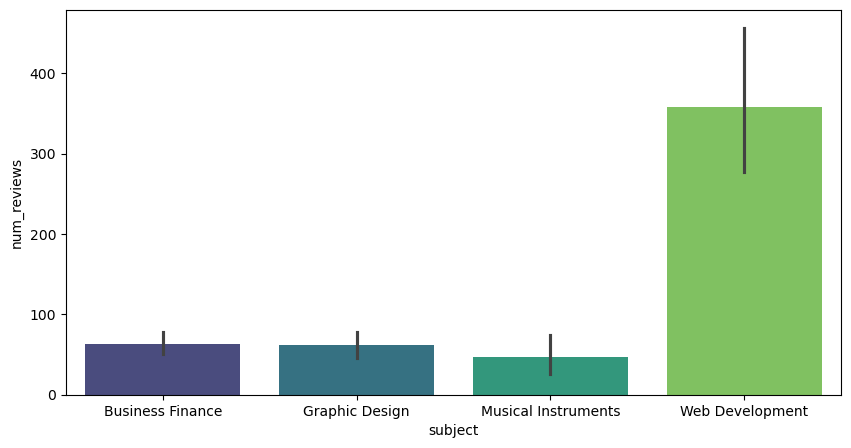

In [87]:
#find then course ehich is having gthe highest number of reviws
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="subject",y="num_reviews",palette="viridis") #it show mean

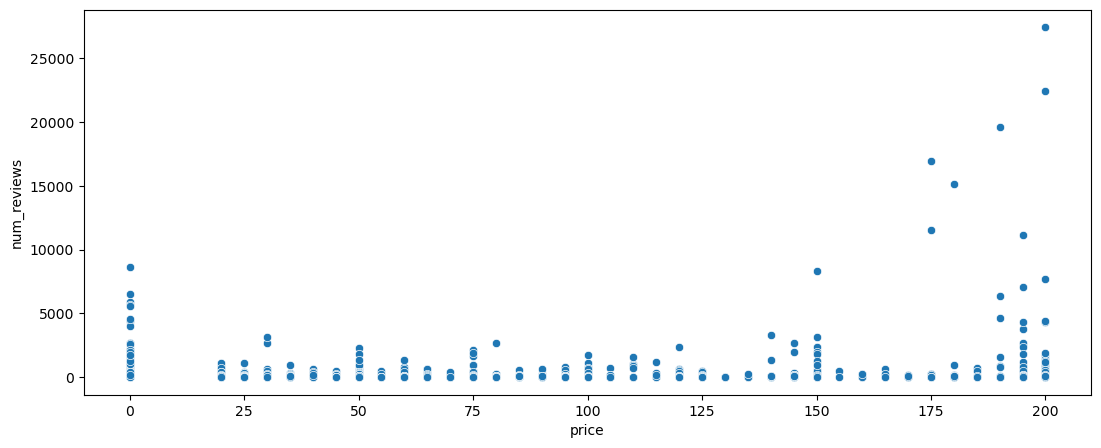

In [93]:
#does proce effect number of reviews
plt.figure(figsize=(13,5))
sns.scatterplot(data=data,x="price",y="num_reviews")
plt.show()
#we can see that those who having the prise is high has more number of reviews

In [95]:
#in which year highest number of cources wer posted
data["year"]=data["published_timestamp"].dt.year
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


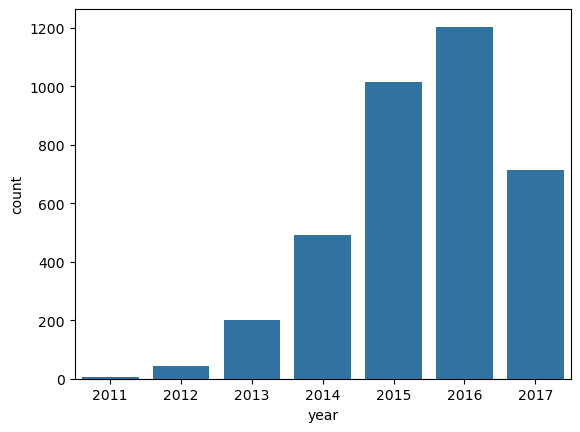

In [99]:
sns.countplot(data=data,x="year")
plt.show()#so we can see that in 2016 highest cources were posted

In [103]:
#Display category wise count of the posted subjects(year wise)
data.groupby("year")["subject"].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64